In [6]:
import os
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
asset = 'AAVE'
file_path = f'/Users/gabrielefabietti/projects/fetch_data/handle_data/{asset}USDT_60_data.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,timestamp,open,high,low,close,volume,turnover
0,199,1620896400000,560.70,560.70,511.30,534.90,2076.47,1.130818e+06
1,198,1620900000000,534.90,557.90,519.50,527.70,2623.83,1.417862e+06
2,197,1620903600000,527.70,560.70,516.40,550.35,4407.74,2.397945e+06
3,196,1620907200000,550.35,569.55,539.40,556.05,5479.96,3.053492e+06
4,195,1620910800000,556.05,563.25,536.35,557.45,4772.74,2.640557e+06


In [24]:
columns = df.columns
if columns[0].startswith('Unnamed:'):
    # Remove the index column
    df = df.iloc[:, 1:]
    
    # Save the modified dataframe back to CSV without the index
    df.to_csv(file_path, index=False)

In [25]:
data_dir = "/Users/gabrielefabietti/projects/fetch_data/handle_data/"
crypto_symbols = ["AVAX", "DOT", "BNB", "TRX", "LTC", "SHIB1000", "XLM", "AAVE"]

# Process each cryptocurrency file
for symbol in crypto_symbols:
    file_path = f"{data_dir}{symbol}USDT_60_data.csv"
    
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Convert timestamp from milliseconds to datetime
        df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')
        
        # Sort by timestamp to ensure chronological order
        df = df.sort_values('timestamp').reset_index(drop=True)
        
        # Check if there are any gaps
        has_gaps = False
        
        # Print the file being processed
        print(f"\nChecking {symbol}USDT_60_data.csv:")
        
        # Loop through the sorted timestamps to find gaps
        for i in range(1, len(df)):
            current_time = df.loc[i, 'datetime']
            previous_time = df.loc[i-1, 'datetime']
            
            # Calculate time difference in hours
            hour_diff = (current_time - previous_time) / timedelta(hours=1)
            
            # If difference is not 1 hour, report it
            if hour_diff != 1:
                has_gaps = True
                hours_missing = int(hour_diff) - 1
                print(f"  Gap of {hours_missing} hour(s) between {previous_time} and {current_time}")
        
        if not has_gaps:
            print(f"  All hourly data is present ✓")
            
    except FileNotFoundError:
        print(f"Warning: File not found - {file_path}")
    except Exception as e:
        print(f"Error processing {symbol} file: {e}")

print("\nCompleted checking for missing hourly data in all cryptocurrency files.")


Checking AVAXUSDT_60_data.csv:
  All hourly data is present ✓

Checking DOTUSDT_60_data.csv:
  All hourly data is present ✓

Checking BNBUSDT_60_data.csv:
  All hourly data is present ✓

Checking TRXUSDT_60_data.csv:
  All hourly data is present ✓

Checking LTCUSDT_60_data.csv:
  All hourly data is present ✓

Checking SHIB1000USDT_60_data.csv:
  All hourly data is present ✓

Checking XLMUSDT_60_data.csv:
  All hourly data is present ✓

Checking AAVEUSDT_60_data.csv:
  All hourly data is present ✓

Completed checking for missing hourly data in all cryptocurrency files.


In [54]:
output_file = f"{data_dir}combined_price_data_2.csv"

# Initialize an empty dataframe to store the combined data
combined_df = None

# Process each cryptocurrency file
for symbol in crypto_symbols:
    file_path = f"{data_dir}{symbol}USDT_60_data.csv"
    
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Select only timestamp and close price
        df_subset = df[['timestamp', 'close']]
        
        # Rename the close column to the asset name
        df_subset = df_subset.rename(columns={'close': symbol})
        
        if combined_df is None:
            # For the first file, initialize the combined dataframe
            combined_df = df_subset
            print(f"Initialized combined dataframe with {symbol} data")
        else:
            # For subsequent files, merge on timestamp
            combined_df = pd.merge(combined_df, df_subset, on='timestamp', how='outer')
            print(f"Merged {symbol} data into combined dataframe")
        
    except FileNotFoundError:
        print(f"Warning: File not found - {file_path}")
    except Exception as e:
        print(f"Error processing {symbol} file: {e}")

if combined_df is not None:
    # Sort by timestamp
    combined_df = combined_df.sort_values('timestamp')
    
    # Convert timestamp to human-readable date (optional)
    combined_df['date'] = pd.to_datetime(combined_df['timestamp'], unit='ms')
    
    # Rearrange columns to have date first, followed by timestamp and then all crypto prices
    columns = ['date', 'timestamp'] + crypto_symbols
    combined_df = combined_df[columns]
    
    # Save to CSV without pandas index
    combined_df.to_csv(output_file, index=False)
    print(f"\nSuccessfully created {output_file} with combined closing prices")
    
    # Print summary info
    print(f"Total rows: {len(combined_df)}")
    print("Date range: {} to {}".format(
        combined_df['date'].min().strftime('%Y-%m-%d %H:%M'),
        combined_df['date'].max().strftime('%Y-%m-%d %H:%M')
    ))
    
    # Check for missing values in each column
    missing_values = combined_df[crypto_symbols].isna().sum()
    print("\nMissing values per cryptocurrency:")
    for symbol, count in missing_values.items():
        if count > 0:
            print(f"  {symbol}: {count} missing values")
        else:
            print(f"  {symbol}: Complete data ✓")
else:
    print("No data was processed. Combined file was not created.")

Initialized combined dataframe with AVAX data
Merged DOT data into combined dataframe
Merged BNB data into combined dataframe
Merged TRX data into combined dataframe
Merged LTC data into combined dataframe
Merged SHIB1000 data into combined dataframe
Merged XLM data into combined dataframe
Merged AAVE data into combined dataframe

Successfully created /Users/gabrielefabietti/projects/fetch_data/handle_data/combined_price_data_2.csv with combined closing prices
Total rows: 37768
Date range: 2020-11-04 23:00 to 2025-02-25 14:00

Missing values per cryptocurrency:
  AVAX: 7546 missing values
  DOT: 3203 missing values
  BNB: 5673 missing values
  TRX: 7191 missing values
  LTC: 1 missing values
  SHIB1000: 8384 missing values
  XLM: 7183 missing values
  AAVE: 4546 missing values


In [61]:
combined_file = f'/Users/gabrielefabietti/projects/fetch_data/handle_data/combined_price_data_2.csv'
df = pd.read_csv(combined_file)
df.head()

,id,timestamp,AVAX,DOT,BNB,TRX,LTC,SHIB1000,XLM,AAVE
0,0,1634713200000,57.165,41.590,485.75,0.10297,186.59,0.027985,0.37420,299.55
1,1,1634716800000,57.145,41.540,485.05,0.10552,187.96,0.027820,0.37500,298.35
2,2,1634720400000,57.295,41.335,485.30,0.10385,188.30,0.027930,0.37325,301.65
3,3,1634724000000,57.260,41.190,485.65,0.10362,187.57,0.027830,0.37130,299.70
4,4,1634727600000,57.490,41.315,485.40,0.10294,189.55,0.027930,0.37090,302.00


In [56]:
# Read the combined CSV file
df = pd.read_csv(combined_file)

# Remove the date column if it exists
if 'date' in df.columns:
    df = df.drop(columns=['date'])
    print("Removed 'date' column")

# Reset the index to create a sequential index column
df = df.reset_index()

# Rename the index column to something more descriptive
df = df.rename(columns={'index': 'id'})

# Save the modified dataframe back to CSV
df.to_csv(combined_file, index=False)

print(f"Successfully updated {combined_file}")
print(f"Added 'row_id' column and removed 'date' column")
print(f"Total rows: {len(df)}")
print(f"Columns: {', '.join(df.columns.tolist())}")

Removed 'date' column
Successfully updated /Users/gabrielefabietti/projects/fetch_data/handle_data/combined_price_data_2.csv
Added 'row_id' column and removed 'date' column
Total rows: 37768
Columns: id, timestamp, AVAX, DOT, BNB, TRX, LTC, SHIB1000, XLM, AAVE


In [62]:
df.head()

,id,timestamp,AVAX,DOT,BNB,TRX,LTC,SHIB1000,XLM,AAVE
0,0,1634713200000,57.165,41.590,485.75,0.10297,186.59,0.027985,0.37420,299.55
1,1,1634716800000,57.145,41.540,485.05,0.10552,187.96,0.027820,0.37500,298.35
2,2,1634720400000,57.295,41.335,485.30,0.10385,188.30,0.027930,0.37325,301.65
3,3,1634724000000,57.260,41.190,485.65,0.10362,187.57,0.027830,0.37130,299.70
4,4,1634727600000,57.490,41.315,485.40,0.10294,189.55,0.027930,0.37090,302.00


In [58]:
# Get the total number of rows before cleaning
original_row_count = len(df)

# Count rows with NaN values
rows_with_nan = df.isna().any(axis=1).sum()

# Drop all rows that have any NaN values
df_clean = df.dropna()

# Reset the index to create a clean sequential index
df_clean = df_clean.reset_index(drop=True)

# If 'row_id' exists, update it to be sequential
if 'id' in df_clean.columns:
    df_clean['id'] = range(len(df_clean))

# Save the cleaned dataframe back to CSV
df_clean.to_csv(combined_file, index=False)

print(f'before: {original_row_count}, after: {len(df_clean)}')

before: 37768, after: 29383


In [63]:
import pandas as pd

# Load the two CSV files
df1 = pd.read_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/combined_price_data.csv')
df2 = pd.read_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/combined_price_data_2.csv')

df1.drop('id', axis=1)
df2.drop('id', axis=1)

# Check the data types of the timestamp column in both dataframes
print("DataFrame 1 timestamp dtype:", df1['timestamp'].dtype)
print("DataFrame 2 timestamp dtype:", df2['timestamp'].dtype)

# Merge the dataframes on timestamp
merged_df = pd.merge(df1, df2, on='timestamp', how='outer', suffixes=('', '_2'))

# If there are duplicate columns besides the suffix ones, we need to handle them
# Let's first check if there are any duplicate columns
duplicate_cols = [col for col in merged_df.columns if col.endswith('_2')]
print(f"Duplicate columns: {duplicate_cols}")

# Sort by timestamp
merged_df = merged_df.sort_values('timestamp')

# Reset the index
merged_df = merged_df.reset_index(drop=True)

# Check the first few rows of the merged dataframe
print(merged_df.head())

# Check for any missing values
print("\nNumber of missing values in each column:")
print(merged_df.isnull().sum())

# Save the merged dataframe to a new CSV file
merged_df.to_csv('merged_price_data.csv', index=False)

print("\nSuccessfully merged the CSV files and saved to 'merged_price_data.csv'")

DataFrame 1 timestamp dtype: int64
DataFrame 2 timestamp dtype: int64
Duplicate columns: ['id_2']
    id      timestamp      BTC      ETH      SOL     XRP    DOGE    LINK  \
0  0.0  1634256000000  57078.5  3769.60  148.055  1.1147  0.2299  26.296   
1  1.0  1634259600000  57281.0  3752.70  148.310  1.1158  0.2296  26.212   
2  2.0  1634263200000  59118.0  3836.45  150.645  1.1365  0.2338  26.781   
3  3.0  1634266800000  59425.0  3824.80  150.960  1.1360  0.2338  26.859   
4  4.0  1634270400000  59600.0  3826.80  154.795  1.1377  0.2329  26.780   

      ADA  id_2  AVAX  DOT  BNB  TRX  LTC  SHIB1000  XLM  AAVE  
0  2.1539   NaN   NaN  NaN  NaN  NaN  NaN       NaN  NaN   NaN  
1  2.1523   NaN   NaN  NaN  NaN  NaN  NaN       NaN  NaN   NaN  
2  2.1806   NaN   NaN  NaN  NaN  NaN  NaN       NaN  NaN   NaN  
3  2.1766   NaN   NaN  NaN  NaN  NaN  NaN       NaN  NaN   NaN  
4  2.2001   NaN   NaN  NaN  NaN  NaN  NaN       NaN  NaN   NaN  

Number of missing values in each column:
id           

In [65]:
merged_df = pd.read_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/merged_price_data.csv')
merged_df.head()

,id,timestamp,BTC,ETH,SOL,XRP,DOGE,LINK,ADA,id_2,AVAX,DOT,BNB,TRX,LTC,SHIB1000,XLM,AAVE
0,0.0,1634256000000,57078.5,3769.60,148.055,1.1147,0.2299,26.296,2.1539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1634259600000,57281.0,3752.70,148.310,1.1158,0.2296,26.212,2.1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1634263200000,59118.0,3836.45,150.645,1.1365,0.2338,26.781,2.1806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1634266800000,59425.0,3824.80,150.960,1.1360,0.2338,26.859,2.1766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1634270400000,59600.0,3826.80,154.795,1.1377,0.2329,26.780,2.2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
merged_df = merged_df.drop(['id', 'id_2'], axis=1)

In [67]:
# Get the total number of rows before cleaning
original_row_count = len(merged_df)

# Count rows with NaN values
rows_with_nan = merged_df.isna().any(axis=1).sum()

# Drop all rows that have any NaN values
merged_df_clean = merged_df.dropna()

# Reset the index to create a clean sequential index
merged_df_clean = merged_df_clean.reset_index(drop=True)

# Save the cleaned dataframe back to CSV
merged_df_clean.to_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/merged_price_data.csv', index=False)

print(f'before: {original_row_count}, after: {len(merged_df_clean)}')

before: 29510, after: 29378


In [68]:
merged_df = pd.read_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/merged_price_data.csv')
merged_df.head()

,timestamp,BTC,ETH,SOL,XRP,DOGE,LINK,ADA,AVAX,DOT,BNB,TRX,LTC,SHIB1000,XLM,AAVE
0,1634713200000,64040.0,3861.85,156.615,1.1013,0.2450,26.060,2.1061,57.165,41.590,485.75,0.10297,186.59,0.027985,0.37420,299.55
1,1634716800000,64065.0,3854.00,156.825,1.1156,0.2449,26.094,2.1092,57.145,41.540,485.05,0.10552,187.96,0.027820,0.37500,298.35
2,1634720400000,64066.0,3873.40,157.440,1.1073,0.2446,26.139,2.1203,57.295,41.335,485.30,0.10385,188.30,0.027930,0.37325,301.65
3,1634724000000,63914.0,3855.80,158.295,1.1059,0.2441,25.998,2.1297,57.260,41.190,485.65,0.10362,187.57,0.027830,0.37130,299.70
4,1634727600000,63877.5,3863.60,160.225,1.1105,0.2442,26.065,2.1450,57.490,41.315,485.40,0.10294,189.55,0.027930,0.37090,302.00


In [75]:


# Load the CSV file
df = pd.read_csv(file)  # Replace with your actual filename

# Convert timestamp to datetime for better readability (optional)
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Create a new DataFrame for variations
variations_df = pd.DataFrame()

# Copy the timestamp and id columns
variations_df['timestamp'] = df['timestamp']
variations_df['datetime'] = df['datetime']

# Calculate the percentage change for each cryptocurrency column
crypto_columns = df.columns[1:-1]  # Skip id, timestamp, and datetime columns
for column in crypto_columns:
    # Calculate the percentage change compared to the previous row
    variations_df[f'{column}'] = df[column].pct_change() * 100

# The first row will have NaN values since there's no previous data to compare
# You can either keep them as NaN or replace with zeros
variations_df = variations_df.fillna(0)  # Replace NaN with 0

# Alternative: drop the first row
variations_df = variations_df.iloc[1:].reset_index(drop=True)

# Save to new CSV file
variations_df.to_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/price_variations.csv', index=False)

# Preview the result
print(variations_df.head())

       timestamp            datetime       BTC       ETH       SOL       XRP  \
0  1634716800000 2021-10-20 08:00:00  0.039038 -0.203270  0.134087  1.298465   
1  1634720400000 2021-10-20 09:00:00  0.001561  0.503373  0.392157 -0.743994   
2  1634724000000 2021-10-20 10:00:00 -0.237255 -0.454381  0.543064 -0.126434   
3  1634727600000 2021-10-20 11:00:00 -0.057108  0.202293  1.219243  0.415951   
4  1634731200000 2021-10-20 12:00:00  0.820320  1.932136  0.227805  0.855471   

       DOGE      LINK       ADA      AVAX       DOT       BNB       TRX  \
0 -0.040816  0.130468  0.147191 -0.034986 -0.120221 -0.144107  2.476449   
1 -0.122499  0.172453  0.526266  0.262490 -0.493500  0.051541 -1.582638   
2 -0.204415 -0.539424  0.443333 -0.061087 -0.350792  0.072120 -0.221473   
3  0.040967  0.257712  0.718411  0.401677  0.303472 -0.051477 -0.656244   
4  0.819001  1.338960  0.624709  1.191512  1.742708  0.813762 -0.437148   

        LTC  SHIB1000       XLM      AAVE  
0  0.734230 -0.589602  0

In [76]:
# Load the CSV file
df = pd.read_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/price_variations.csv')  # Replace with your actual filename

# Remove the datetime column
df = df.drop('datetime', axis=1)

# Reset the index and name it 'id'
df = df.reset_index(drop=True)
df.index.name = 'id'

# Alternatively, if you want 'id' as a regular column (not index):
# df = df.reset_index()
# df = df.rename(columns={'index': 'id'})

# Save to CSV
df.to_csv('/Users/gabrielefabietti/projects/fetch_data/handle_data/price_variations_2.csv')

# Preview the result
print(df.head())

        timestamp       BTC       ETH       SOL       XRP      DOGE      LINK  \
id                                                                              
0   1634716800000  0.039038 -0.203270  0.134087  1.298465 -0.040816  0.130468   
1   1634720400000  0.001561  0.503373  0.392157 -0.743994 -0.122499  0.172453   
2   1634724000000 -0.237255 -0.454381  0.543064 -0.126434 -0.204415 -0.539424   
3   1634727600000 -0.057108  0.202293  1.219243  0.415951  0.040967  0.257712   
4   1634731200000  0.820320  1.932136  0.227805  0.855471  0.819001  1.338960   

         ADA      AVAX       DOT       BNB       TRX       LTC  SHIB1000  \
id                                                                         
0   0.147191 -0.034986 -0.120221 -0.144107  2.476449  0.734230 -0.589602   
1   0.526266  0.262490 -0.493500  0.051541 -1.582638  0.180890  0.395399   
2   0.443333 -0.061087 -0.350792  0.072120 -0.221473 -0.387679 -0.358038   
3   0.718411  0.401677  0.303472 -0.051477 -0.656244

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29377 entries, 0 to 29376
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  29377 non-null  int64  
 1   BTC        29377 non-null  float64
 2   ETH        29377 non-null  float64
 3   SOL        29377 non-null  float64
 4   XRP        29377 non-null  float64
 5   DOGE       29377 non-null  float64
 6   LINK       29377 non-null  float64
 7   ADA        29377 non-null  float64
 8   AVAX       29377 non-null  float64
 9   DOT        29377 non-null  float64
 10  BNB        29377 non-null  float64
 11  TRX        29377 non-null  float64
 12  LTC        29377 non-null  float64
 13  SHIB1000   29377 non-null  float64
 14  XLM        29377 non-null  float64
 15  AAVE       29377 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 3.6 MB


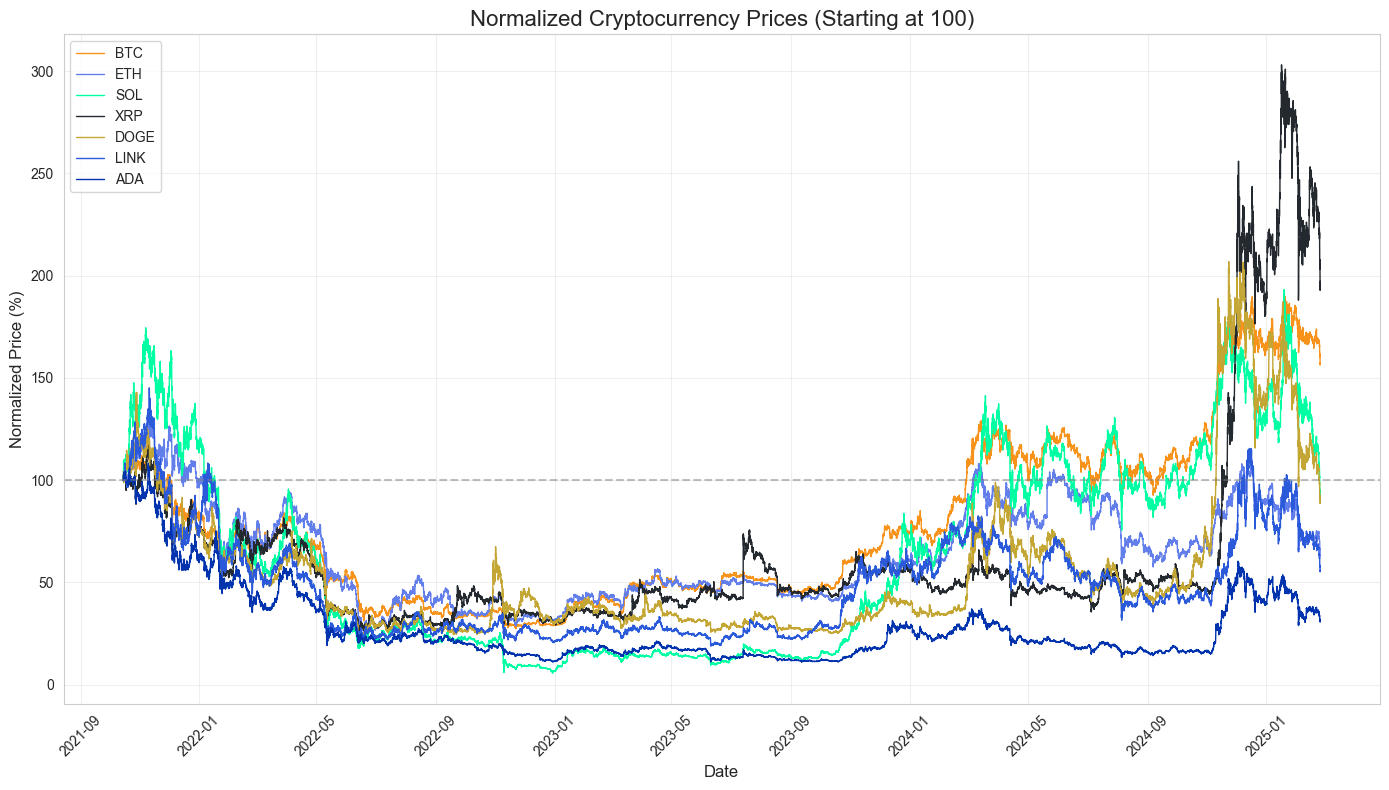

Performance metrics (from first to last data point):


,Cryptocurrency,Total Return (%)
3,XRP,97.25
0,BTC,57.41
2,SOL,-6.34
4,DOGE,-10.64
1,ETH,-36.40
5,LINK,-43.97
6,ADA,-69.20


In [39]:
# Read the data
df = pd.read_csv(combined_file)

# Convert timestamp to datetime for better x-axis labels
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

# Get crypto symbols (all columns except row_id, timestamp, and date)
crypto_symbols = [col for col in df.columns if col not in ['id', 'timestamp', 'date']]

# Create a new DataFrame for normalized prices
normalized_df = pd.DataFrame()
normalized_df['date'] = df['date']

# Normalize each cryptocurrency's price series to start at 100
for symbol in crypto_symbols:
    first_price = df[symbol].iloc[0]
    normalized_df[symbol] = (df[symbol] / first_price) * 100

# Set up the plot with a nice style
plt.figure(figsize=(14, 8))
sns.set_style('whitegrid')

# Define a color palette for the cryptocurrencies
colors = {
    'BTC': '#F7931A',  # Bitcoin orange
    'ETH': '#627EEA',  # Ethereum blue
    'SOL': '#00FFA3',  # Solana green
    'XRP': '#23292F',  # Ripple dark
    'DOGE': '#C3A634', # Dogecoin gold
    'LINK': '#2A5ADA', # Chainlink blue
    'ADA': '#0033AD'   # Cardano blue
}

# Plot each cryptocurrency
for symbol in crypto_symbols:
    plt.plot(normalized_df['date'], 
             normalized_df[symbol], 
             label=symbol, 
             linewidth=1,
             color=colors.get(symbol, None))

# Customize the plot
plt.title('Normalized Cryptocurrency Prices (Starting at 100)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Normalized Price (%)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Improve the date formatting on x-axis
plt.xticks(rotation=45)
plt.tight_layout()

# Add a horizontal line at 100 to highlight the starting point
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

# Optional: Create a table with performance metrics
print("Performance metrics (from first to last data point):")
performance = {}
for symbol in crypto_symbols:
    start_price = df[symbol].iloc[0]
    end_price = df[symbol].iloc[-1]
    percent_change = ((end_price / start_price) - 1) * 100
    performance[symbol] = percent_change

# Convert to DataFrame and sort by performance
performance_df = pd.DataFrame(list(performance.items()), columns=['Cryptocurrency', 'Total Return (%)'])
performance_df = performance_df.sort_values('Total Return (%)', ascending=False)
performance_df['Total Return (%)'] = performance_df['Total Return (%)'].round(2)
display(performance_df)